<a href="https://colab.research.google.com/github/MarshallPotts/CSE450-Machine-Learning/blob/main/ice2_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
!pip install scikit-learn==1.5.2

In [137]:
# Load some test data
import pandas as pd
energy = pd.read_csv('/content/energy-training.csv')
energy.head(20)

,Year,Month,Day,Hours,Minutes,Time-since-start,Appliances,lights,T1,RH_1,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016,5,10,14,50,17267,60,0,25.200000,47.126667,...,24.100000,47.525714,18.800,750.150000,78.000000,4.500000,40.000000,14.8000,41.358725,41.358725
1,2016,5,4,21,50,16445,60,0,23.390000,33.790000,...,20.390000,34.463333,10.900,764.283333,57.333333,3.000000,40.000000,2.7700,9.024852,9.024852
2,2016,3,16,20,20,9380,140,20,22.600000,37.360000,...,19.600000,36.200000,5.270,765.200000,62.000000,5.666667,23.333333,-1.5000,49.291757,49.291757
3,2016,3,19,2,30,9705,50,0,21.790000,36.760000,...,19.700000,39.560000,4.700,762.300000,92.000000,3.500000,62.500000,3.5000,0.102888,0.102888
4,2016,3,11,5,40,8572,50,0,20.500000,36.200000,...,18.166667,41.090000,-0.767,763.600000,93.666667,1.333333,33.000000,-1.7000,8.882974,8.882974
5,2016,5,20,3,50,18641,50,0,22.926667,41.290000,...,22.600000,44.290000,9.970,757.700000,93.500000,4.666667,30.833333,8.9200,39.860770,39.860770
6,2016,2,3,19,20,3326,120,20,22.390000,48.293333,...,18.390000,42.790000,5.230,763.466667,80.333333,3.666667,40.000000,2.0700,30.096795,30.096795
7,2016,4,13,4,40,13318,50,0,21.890000,41.200000,...,21.000000,43.590000,5.830,750.666667,89.000000,1.000000,40.000000,4.1700,33.149170,33.149170
8,2016,5,16,14,10,18127,90,10,23.390000,41.433333,...,22.890000,39.656667,12.800,761.066667,56.333333,1.000000,40.000000,4.2500,48.081977,48.081977
9,2016,5,9,14,10,17119,240,0,25.100000,40.466667,...,23.600000,41.400000,22.800,752.800000,45.666667,3.000000,40.000000,10.5000,9.666577,9.666577


In [138]:
energy.info()
energy.drop_duplicates(inplace=True)
energy.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13900 entries, 0 to 13899
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              13900 non-null  int64  
 1   Month             13900 non-null  int64  
 2   Day               13900 non-null  int64  
 3   Hours             13900 non-null  int64  
 4   Minutes           13900 non-null  int64  
 5   Time-since-start  13900 non-null  int64  
 6   Appliances        13900 non-null  int64  
 7   lights            13900 non-null  int64  
 8   T1                13900 non-null  float64
 9   RH_1              13900 non-null  float64
 10  T2                13900 non-null  float64
 11  RH_2              13900 non-null  float64
 12  T3                13900 non-null  float64
 13  RH_3              13900 non-null  float64
 14  T4                13900 non-null  float64
 15  RH_4              13900 non-null  float64
 16  T5                13900 non-null  float6

In [139]:
energy.describe()

,Year,Month,Day,Hours,Minutes,Time-since-start,Appliances,lights,T1,RH_1,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,13900.0,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,...,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000,13900.000000
mean,2016.0,3.105971,16.055827,11.566691,24.963309,9886.036906,97.559712,3.821583,21.700267,40.265542,...,19.496861,41.539837,7.454885,755.446790,79.643569,4.039738,38.236453,3.779156,25.052189,25.052189
std,0.0,1.339781,8.412886,6.944411,17.085846,5703.449162,102.004031,7.962416,1.610177,3.983979,...,2.018137,4.149922,5.326979,7.417877,14.946123,2.445833,11.734640,4.192853,14.483581,14.483581
min,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,16.790000,27.023333,...,14.890000,29.166667,-5.000000,729.333333,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,2016.0,2.000000,9.000000,6.000000,10.000000,4946.750000,50.000000,0.000000,20.767500,37.330390,...,18.000000,38.500000,3.700000,750.883333,70.166667,2.000000,29.000000,0.900000,12.575162,12.575162
50%,2016.0,3.000000,16.000000,12.000000,20.000000,9870.000000,60.000000,0.000000,21.600000,39.663333,...,19.390000,40.900000,6.950000,756.000000,83.500000,3.666667,40.000000,3.425000,24.966261,24.966261
75%,2016.0,4.000000,23.000000,18.000000,40.000000,14835.500000,100.000000,0.000000,22.666667,43.060000,...,20.600000,44.290000,10.400000,760.866667,91.666667,5.500000,40.000000,6.600000,37.705345,37.705345
max,2016.0,5.000000,31.000000,23.000000,50.000000,19734.000000,900.000000,70.000000,26.260000,57.663333,...,24.500000,53.090000,26.100000,772.300000,100.000000,14.000000,66.000000,15.300000,49.996530,49.996530


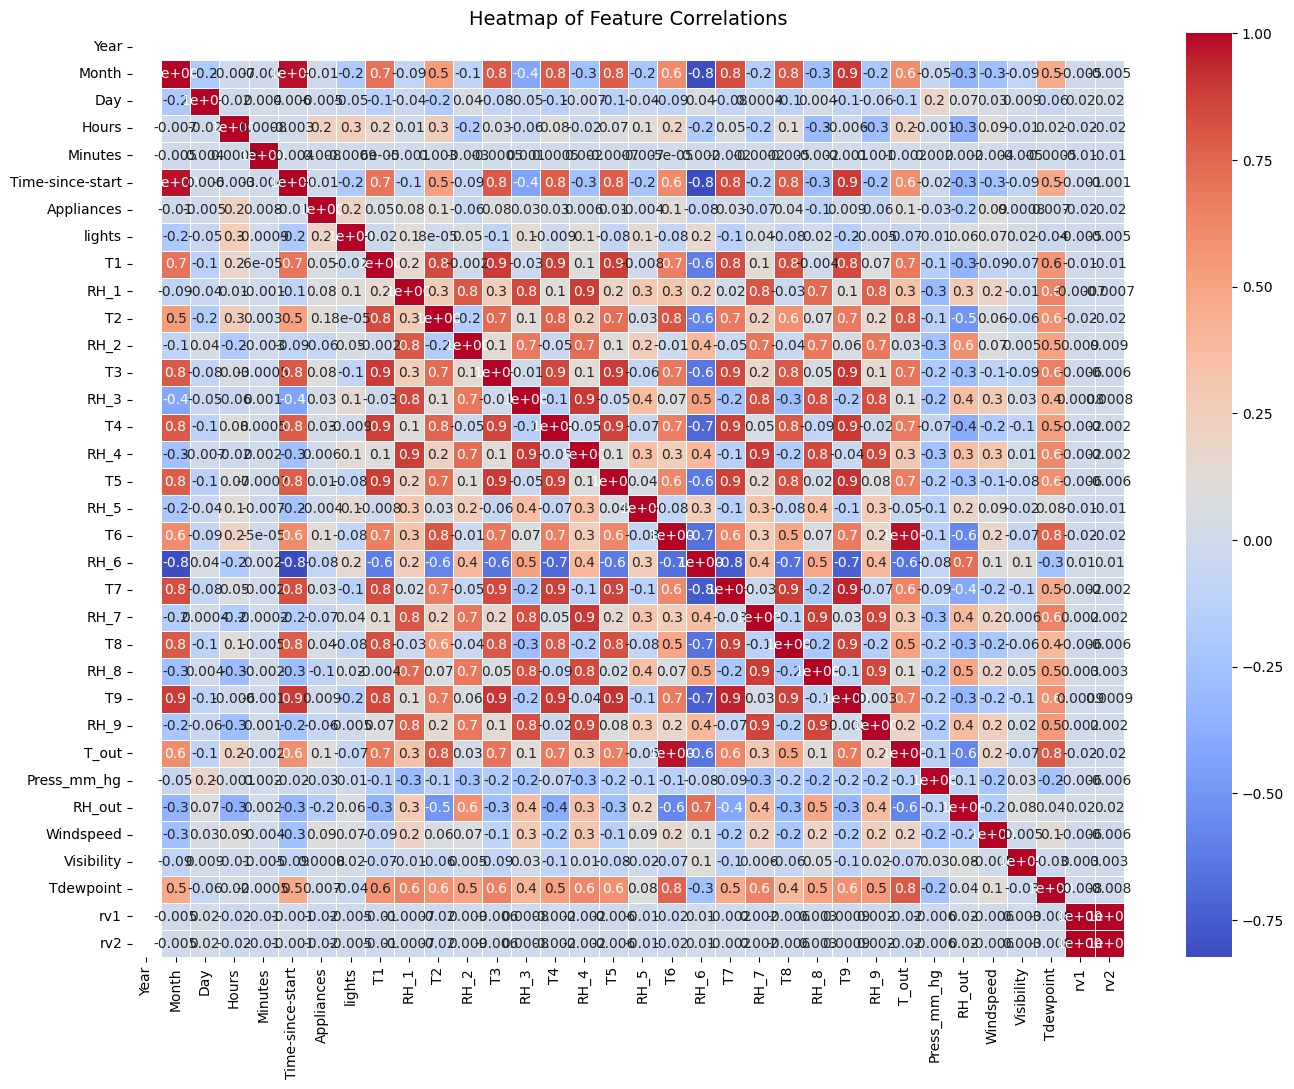

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = energy.corr()

# Set up the figure size
plt.figure(figsize=(16, 12))

# Create a heatmap with percentage values
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1", linewidths=0.5)

# Title
plt.title("Heatmap of Feature Correlations", fontsize=14)

# Show the heatmap
plt.show()

STRONGEST CORRELATIONS
0.2 for lights and 0.2 for hours. 0.1 for T_out

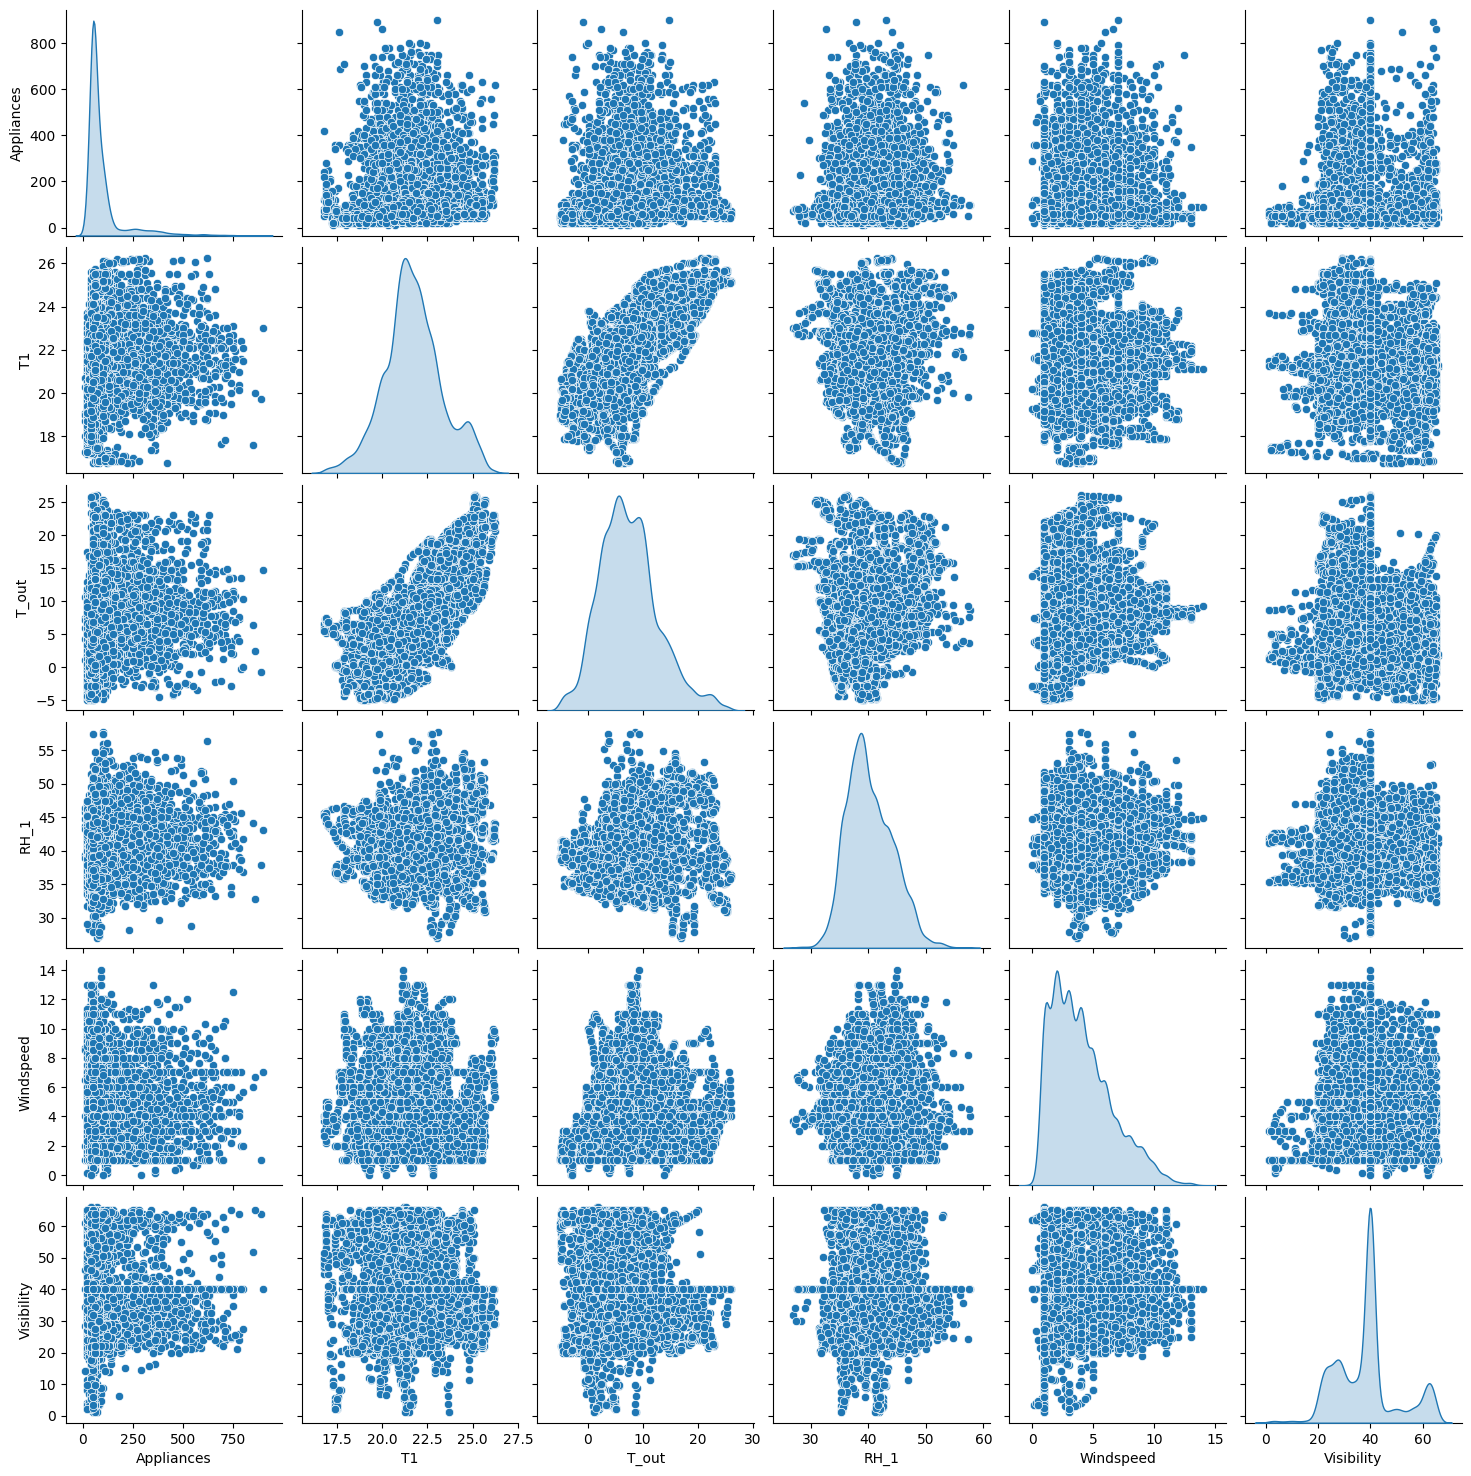

In [141]:
# Select top influencing features
features = ["Appliances", "T1", "T_out", "RH_1", "Windspeed", "Visibility"]

# Pairplot
sns.pairplot(energy[features], diag_kind="kde")
plt.show()

T1 and T_out show some linearity
Visibility has line at 40
Windspeed has a line at 7

<Axes: xlabel='Hours', ylabel='lights'>

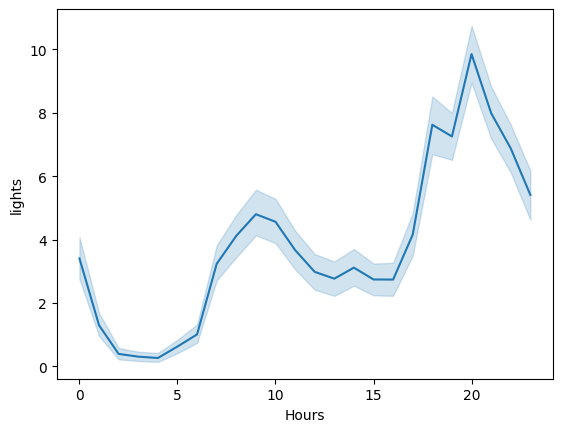

In [142]:
sns.lineplot(data=energy, x='Hours', y='lights')

<Axes: xlabel='Appliances', ylabel='time_mag'>

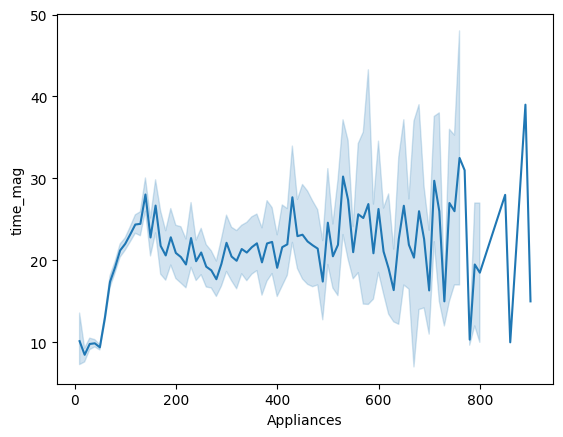

In [143]:
energy['time_mag'] = energy['lights'] + energy['Hours']

#plot time mag vs appliances
sns.lineplot(data=energy, x='Appliances', y='time_mag')

<Axes: xlabel='Appliances', ylabel='Hours'>

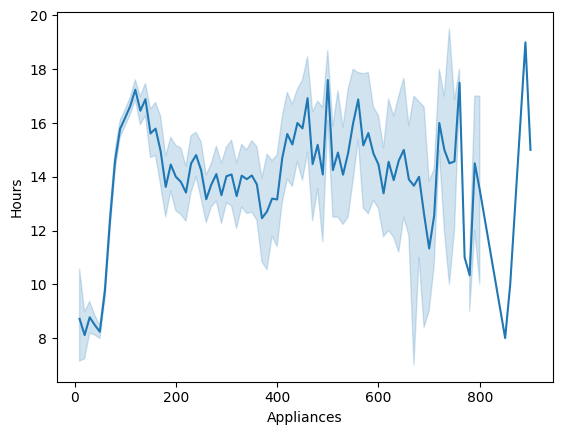

In [144]:
#plot of hours vs appliances
sns.lineplot(data=energy, x='Appliances', y='Hours')

<Axes: xlabel='Appliances', ylabel='lights'>

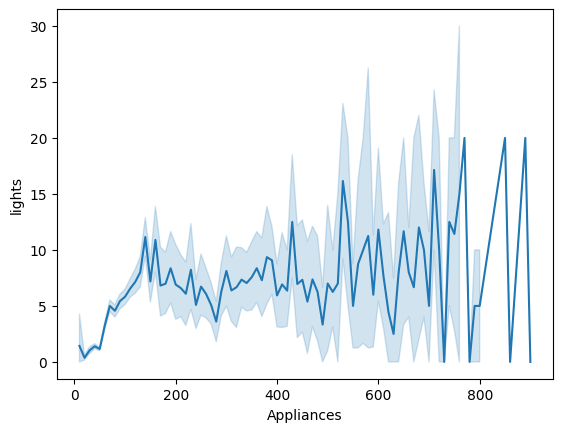

In [145]:
#plot of lights vs appliances
sns.lineplot(data=energy, x='Appliances', y='lights')

<Axes: xlabel='T_out', ylabel='Appliances'>

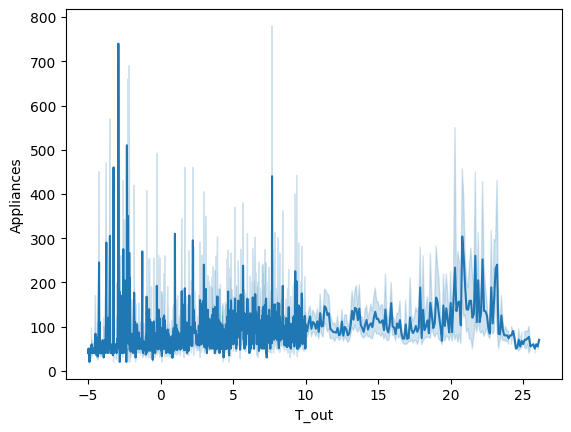

In [146]:
#plot of appliances vs T_out
sns.lineplot(data=energy, x='T_out', y='Appliances')

<Axes: xlabel='Appliances', ylabel='rv1'>

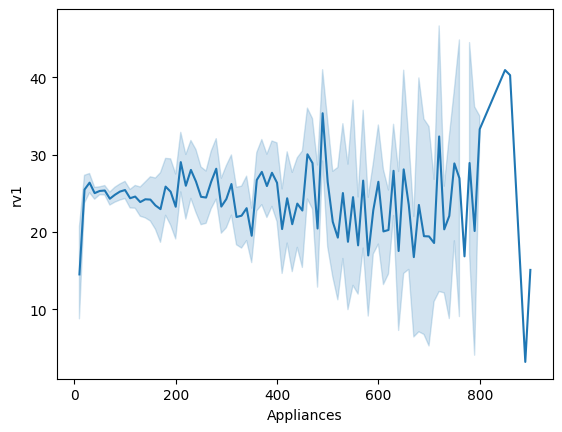

In [147]:
#plot of appliances vs rv1 and rv2
sns.lineplot(data=energy, x='Appliances', y='rv1')

<Axes: xlabel='Appliances', ylabel='rv2'>

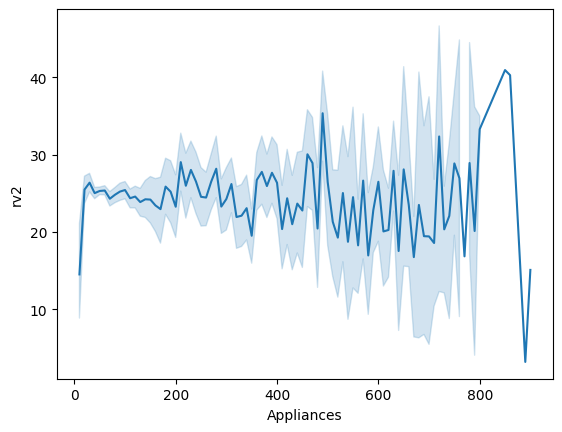

In [148]:
#plot appliances vs rv2
sns.lineplot(data=energy, x='Appliances', y='rv2')

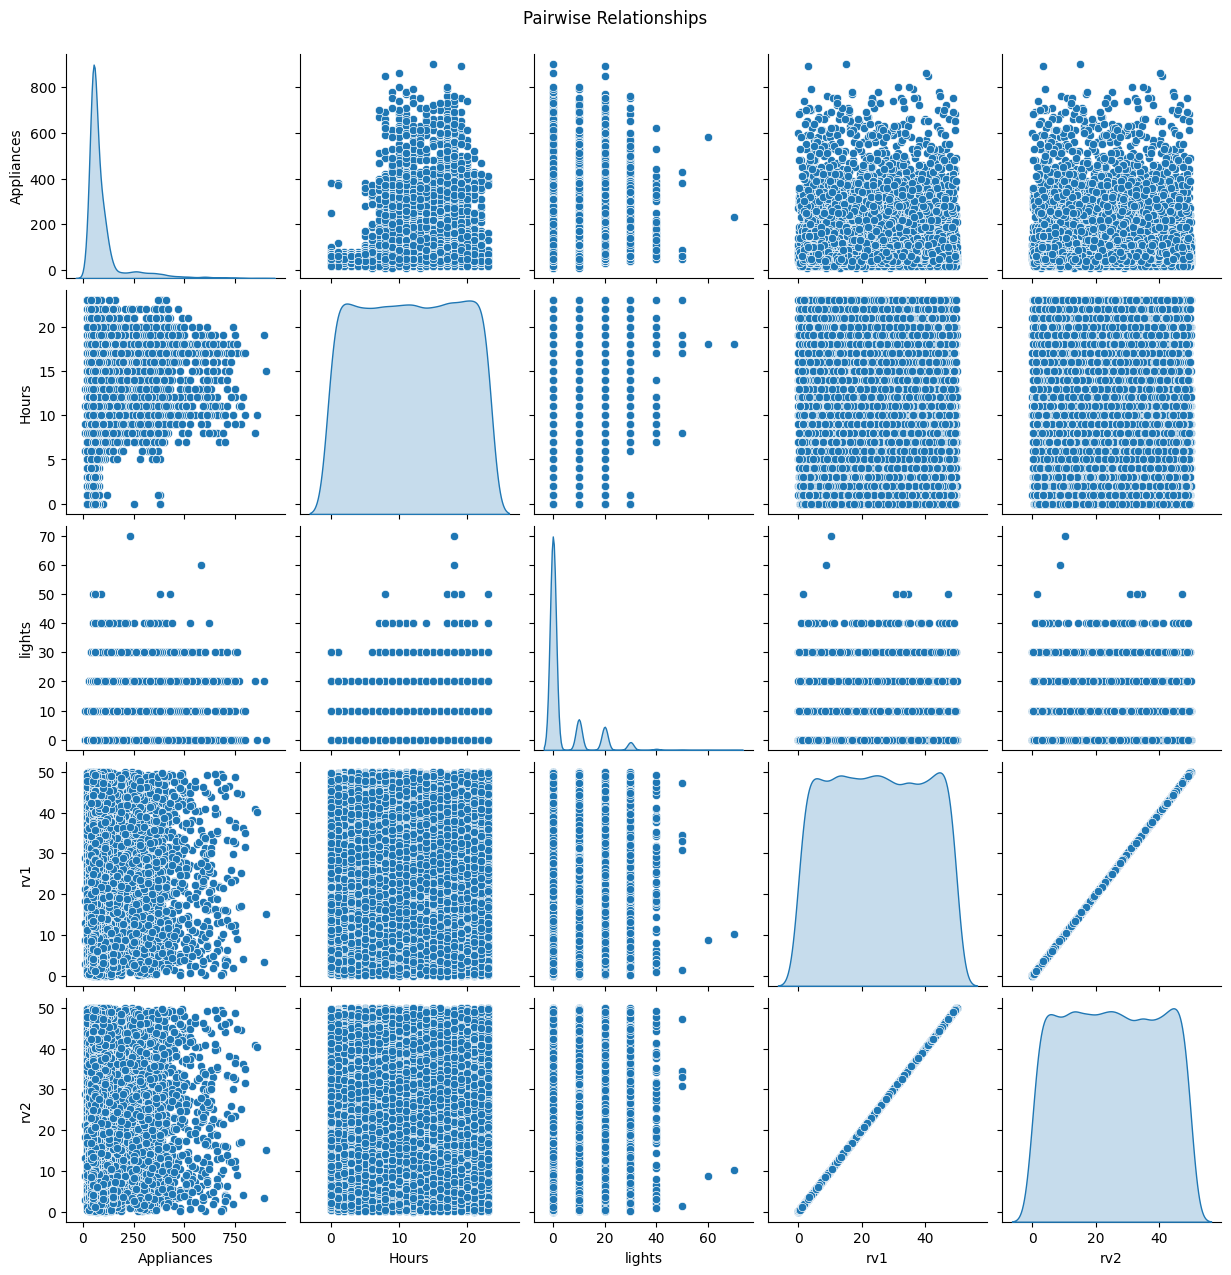

In [149]:
# Select relevant features
features = ["Appliances", "Hours", "lights", "rv1", "rv2"]

# Create a pair plot
sns.pairplot(energy[features], diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

rv1 and rv2 have positive linear realationship

<Axes: xlabel='Appliances', ylabel='rv+'>

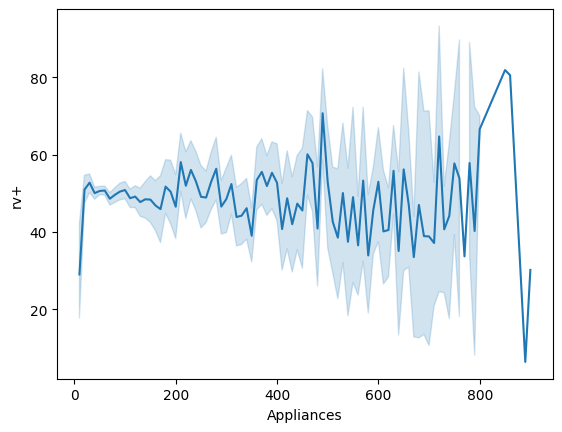

In [150]:
energy['rv+'] = energy['rv1'] + energy['rv2']
energy['rv-'] = energy['rv1'] - energy['rv2']

#plot of appliances vs rv+ and rv-
sns.lineplot(data=energy, x='Appliances', y='rv+')

<Axes: xlabel='Appliances', ylabel='rv*'>

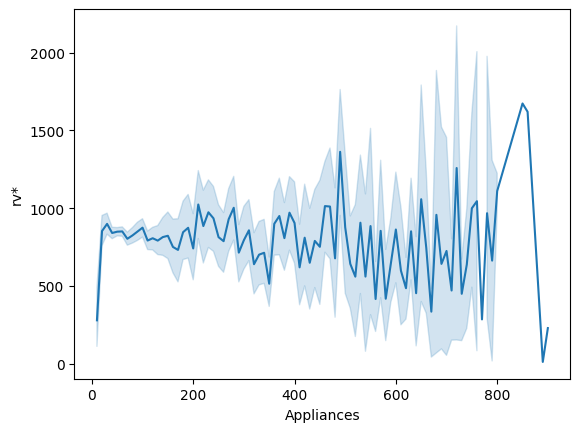

In [151]:
energy['rv*'] = energy['rv1'] * energy['rv2']
energy['rv/'] = energy['rv1'] / energy['rv2']

#plot of appliances vs rv* and rv/
sns.lineplot(data=energy, x='Appliances', y='rv*')

In [152]:
energy.head(20)

,Year,Month,Day,Hours,Minutes,Time-since-start,Appliances,lights,T1,RH_1,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,time_mag,rv+,rv-,rv*,rv/
0,2016,5,10,14,50,17267,60,0,25.200000,47.126667,...,4.500000,40.000000,14.8000,41.358725,41.358725,14,82.717450,0.0,1710.544132,1.0
1,2016,5,4,21,50,16445,60,0,23.390000,33.790000,...,3.000000,40.000000,2.7700,9.024852,9.024852,21,18.049703,0.0,81.447946,1.0
2,2016,3,16,20,20,9380,140,20,22.600000,37.360000,...,5.666667,23.333333,-1.5000,49.291757,49.291757,40,98.583515,0.0,2429.677339,1.0
3,2016,3,19,2,30,9705,50,0,21.790000,36.760000,...,3.500000,62.500000,3.5000,0.102888,0.102888,2,0.205776,0.0,0.010586,1.0
4,2016,3,11,5,40,8572,50,0,20.500000,36.200000,...,1.333333,33.000000,-1.7000,8.882974,8.882974,5,17.765947,0.0,78.907220,1.0
5,2016,5,20,3,50,18641,50,0,22.926667,41.290000,...,4.666667,30.833333,8.9200,39.860770,39.860770,3,79.721540,0.0,1588.880972,1.0
6,2016,2,3,19,20,3326,120,20,22.390000,48.293333,...,3.666667,40.000000,2.0700,30.096795,30.096795,39,60.193590,0.0,905.817059,1.0
7,2016,4,13,4,40,13318,50,0,21.890000,41.200000,...,1.000000,40.000000,4.1700,33.149170,33.149170,4,66.298341,0.0,1098.867494,1.0
8,2016,5,16,14,10,18127,90,10,23.390000,41.433333,...,1.000000,40.000000,4.2500,48.081977,48.081977,24,96.163954,0.0,2311.876523,1.0
9,2016,5,9,14,10,17119,240,0,25.100000,40.466667,...,3.000000,40.000000,10.5000,9.666577,9.666577,14,19.333154,0.0,93.442713,1.0


In [153]:
# Import the libraries we need
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [154]:
exclude_columns = []


# Get our target variable and features and split them into test and train datasets

X = energy.drop(columns=exclude_columns)
y = energy['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [156]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([ 50.000042,  30.000317, 120.00077 , ...,  59.999954,  30.000317,
        40.00014 ], dtype=float32)

In [157]:
# Compute the Root Mean Squared Error of the predictions
from sklearn.metrics import root_mean_squared_error

result = root_mean_squared_error(y_test, predictions)
result

# Looks like we're off by just 4.5 mpg on average
# Not bad for a quick run with no real preprocessing

np.float64(0.39224886694398353)

In [160]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


result = mean_absolute_error(y_test, predictions)
result
#print all metrics
print("MAE:", result)
result = mean_squared_error(y_test, predictions)
print("MSE:", result)
result = r2_score(y_test, predictions)
print("R2:", result)
#print accuracy


MAE: 0.03178331354539171
MSE: 0.1538591736188389
R2: 0.9999828934669495


In [162]:
energy_hold = pd.read_csv('/content/energy-holdout.csv')

energy_hold['rv+'] = energy_hold['rv1'] + energy_hold['rv2']
energy_hold['rv-'] = energy_hold['rv1'] - energy_hold['rv2']
energy_hold['rv*'] = energy_hold['rv1'] * energy_hold['rv2']
energy_hold['rv/'] = energy_hold['rv1'] / energy_hold['rv2']

energy_hold['time_mag'] = energy_hold['lights'] + energy_hold['Hours']

# Ensure energy_hold has the same columns as X_train in the same order
energy_hold = energy_hold[X_train.columns]  # Reorder columns to match X_train

predictions = model.predict(energy_hold)
predictions

KeyError: "['Appliances'] not in index"